<a href="https://colab.research.google.com/github/srija-guda/ML-Assignment-1/blob/main/Assn1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import geopandas as gpd
from sklearn.preprocessing import RobustScaler, QuantileTransformer, PowerTransformer

# Question 2

In [ ]:
file_path = '/content/drive/MyDrive/Classroom/1st Sem 2024-25 (BITS F464: Machine Learning)/housing.csv'

In [ ]:
df = pd.read_csv(file_path)

In [ ]:
number_of_rows = df.shape[0]
print(f'The number of rows are {number_of_rows} ')

The number of rows are 20640 


In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [ ]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND


# Question 3

**Note:** `df_numeric` is a subset of the original dataset, which includes only the numeric attributes.

In [ ]:
df_statistics = df.describe().T
df_numeric = df.select_dtypes(include=['number'])
df_statistics['median'] = df_numeric.median()
df_statistics.T

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000
median,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000


# Question 4


**Note:** The green mark on the box plot indicates the mean of the distribution.

We have used box plots and violin plots to display the descriptive statistics of the data.

The box plots display the minimum, first quartile, median, third quartile, maximum, and mean values.

The violin plots extend the box plot by also showing the probability density of the data at different values.

In [ ]:
def visualise_statistics(desc_stats: pd.DataFrame):
    sns.set(style = "whitegrid")

    for column in desc_stats.columns:
        fig, axes = plt.subplots(1, 2, figsize = (10, 6))
        sns.boxplot(y = desc_stats[column], ax = axes[0], showmeans = True)
        axes[0].set_title(f'Box Plot of {column}')
        axes[0].set_xlabel(column)
        axes[0].set_ylabel('Value')
        sns.violinplot(y = desc_stats[column], ax = axes[1], inner = "quartile")
        axes[1].set_title(f'Violin Plot of {column}')
        axes[1].set_xlabel(column)
        axes[1].set_ylabel('Value')
        plt.tight_layout()
        plt.show()

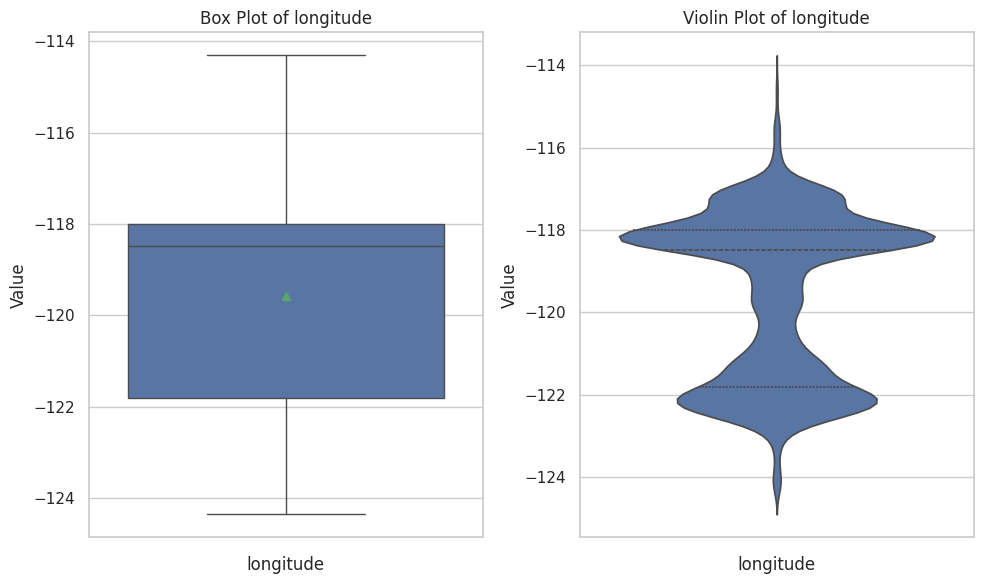

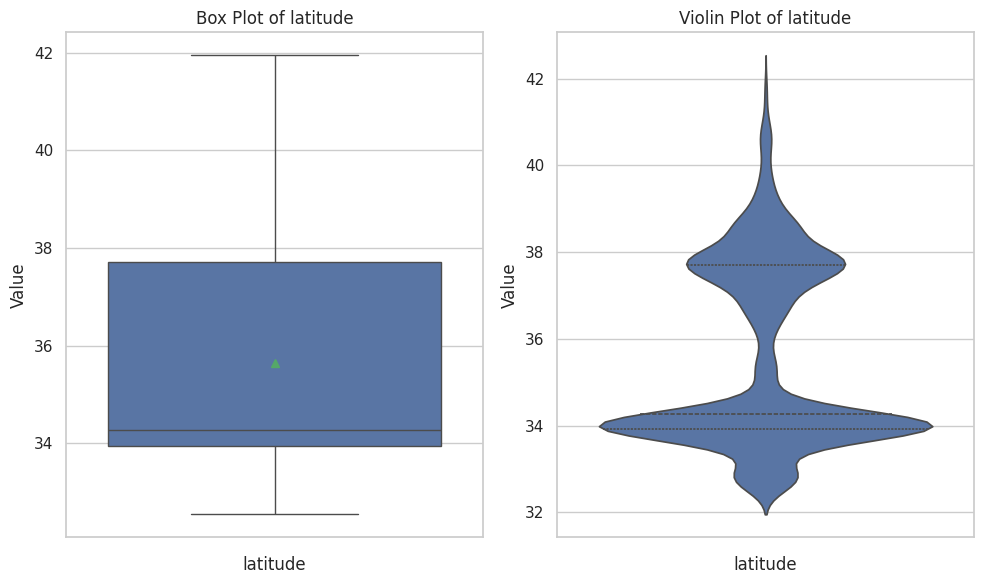

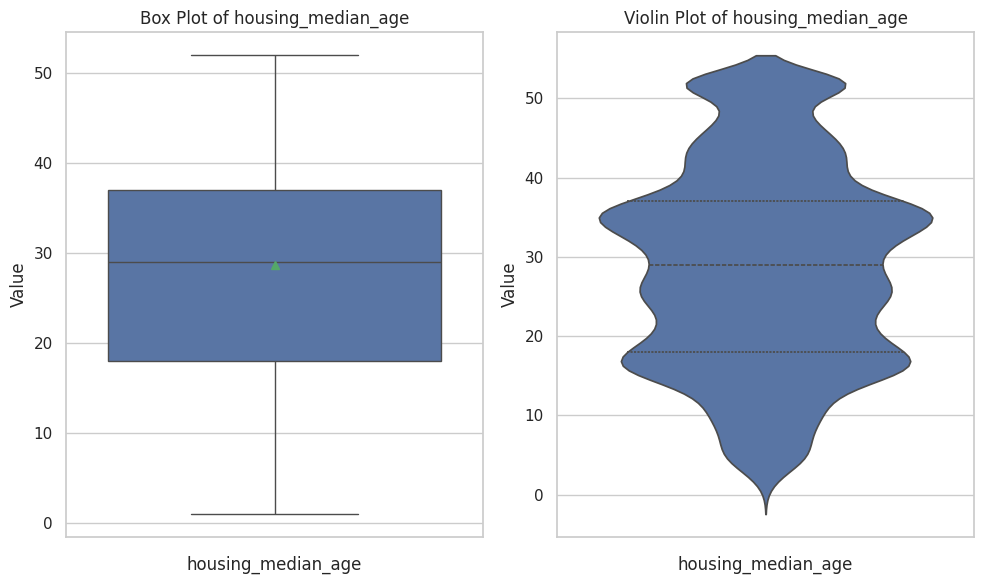

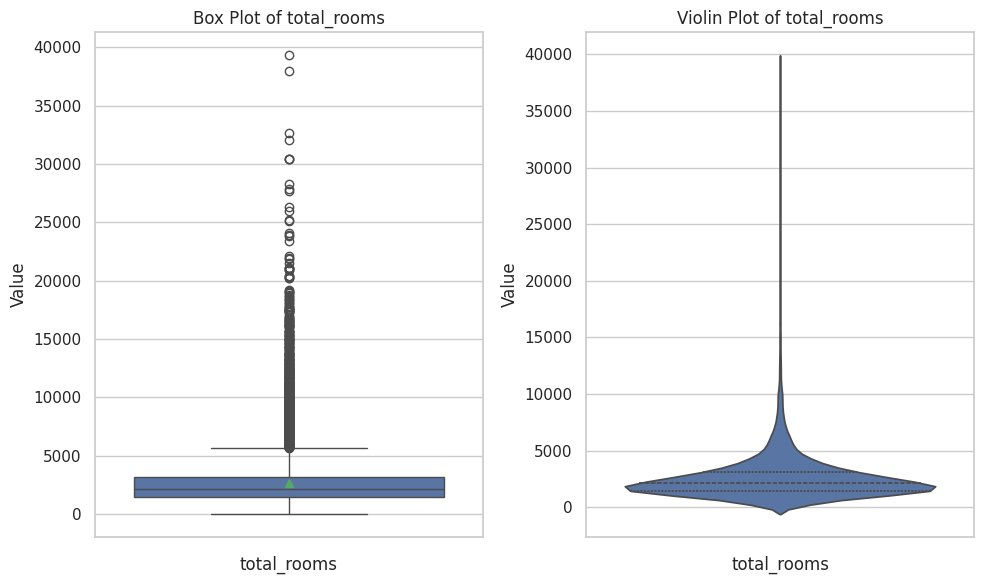

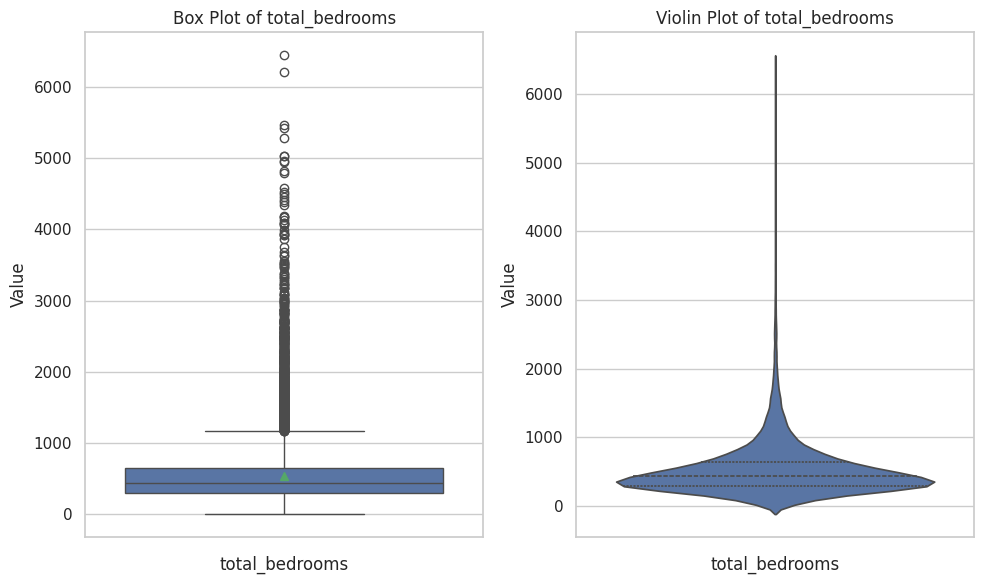

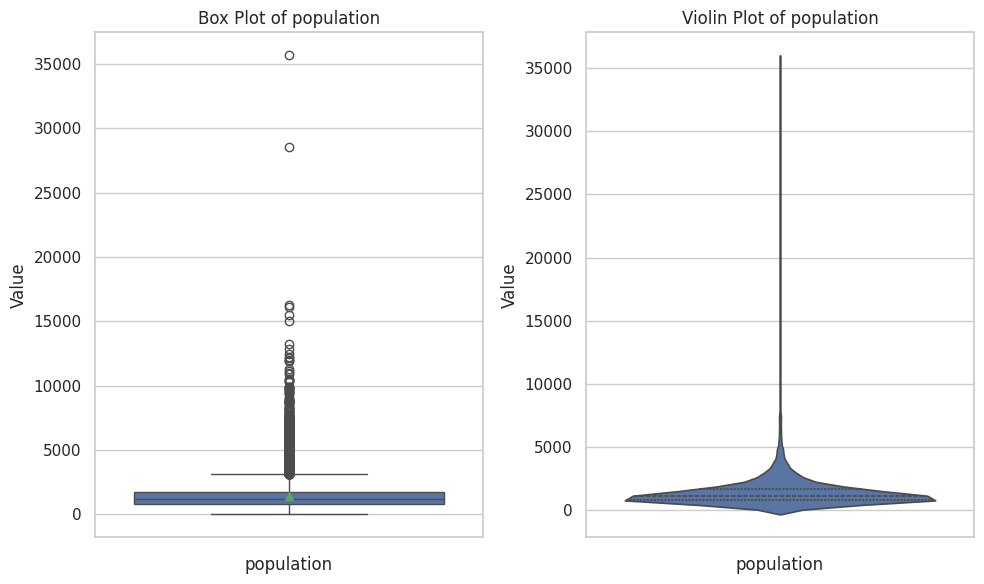

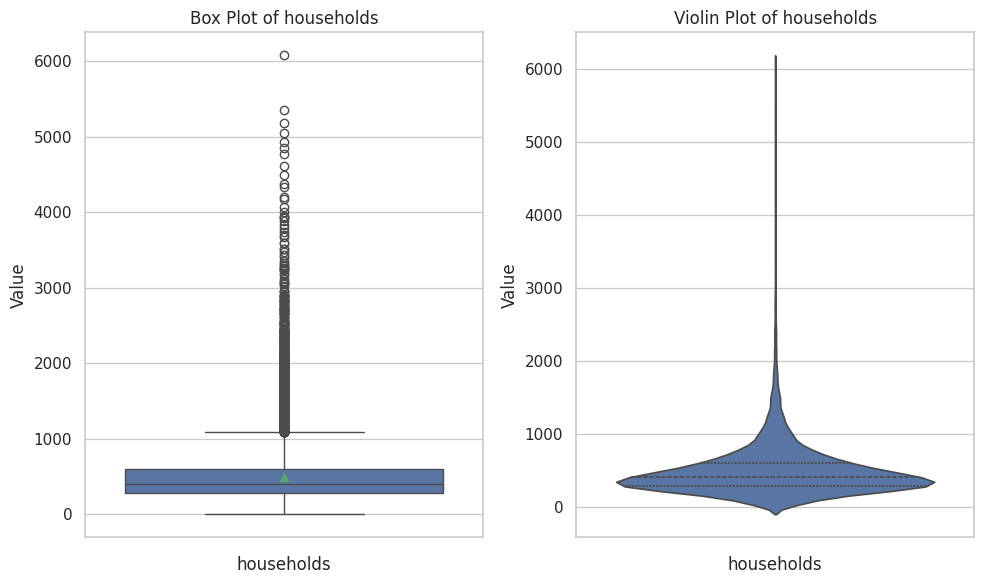

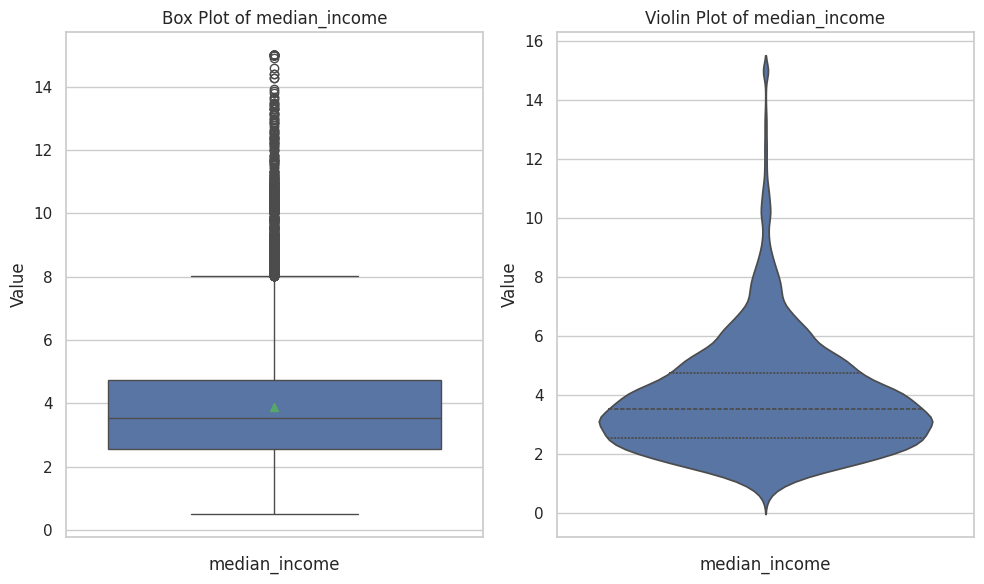

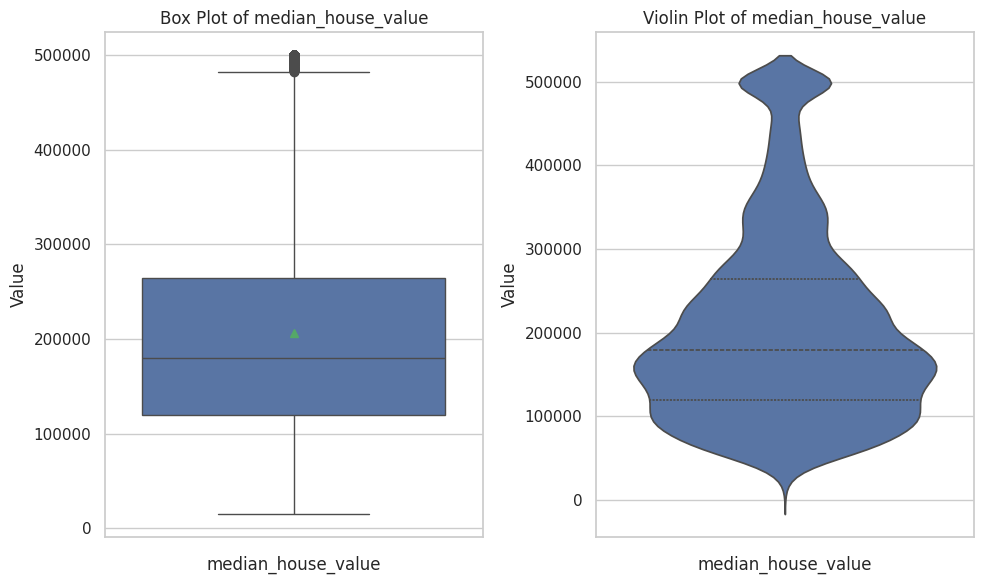

In [ ]:
visualise_statistics(df_numeric)

# Question 5


In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


# Question 6

In [ ]:
def impute_and_plot(df: pd.DataFrame):
    sns.set(style = "whitegrid")
    for column in df.columns:
        if df[column].isnull().sum() > 0:
            no_impute = df[column].dropna()
            mean_imputed = df[column].fillna(df[column].mean())
            median_imputed = df[column].fillna(df[column].median())
            mode_imputed = df[column].fillna(df[column].mode()[0])
            fig, axes = plt.subplots(1, 4, figsize = (20, 6), sharey = True)
            sns.histplot(no_impute, ax = axes[0], kde = True, color = 'blue')
            axes[0].set_title(f'Original {column} (No Imputation)')
            axes[0].set_xlabel(column)
            axes[0].set_ylabel('Frequency')
            sns.histplot(mean_imputed, ax = axes[1], kde = True, color = 'green')
            axes[1].set_title(f'Mean Imputation of {column}')
            axes[1].set_xlabel(column)
            sns.histplot(median_imputed, ax = axes[2], kde = True, color = 'orange')
            axes[2].set_title(f'Median Imputation of {column}')
            axes[2].set_xlabel(column)
            sns.histplot(mode_imputed, ax = axes[3], kde = True, color = 'red')
            axes[3].set_title(f'Mode Imputation of {column}')
            axes[3].set_xlabel(column)
            plt.tight_layout()
            plt.show()

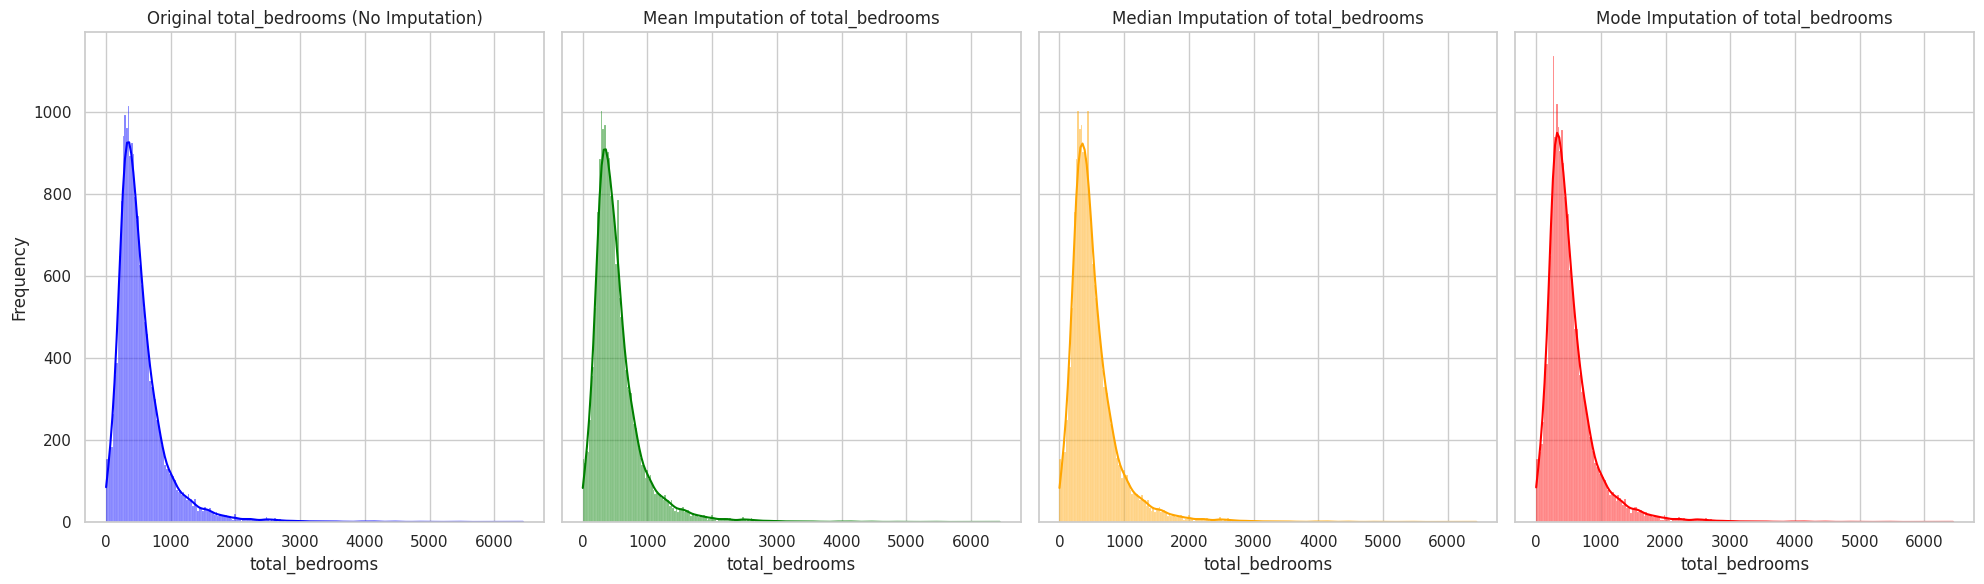

In [ ]:
impute_and_plot(df)

In [ ]:
# Imputing missing values with mean
# df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].mean())

# Imputing missing values with median
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].median())

# Imputing missing values with mode
# df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].mode())

missing_values = df.isnull().sum()
print(missing_values)

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


# Question 7

In [ ]:
duplicates = df[df.duplicated()]

print("Number of Duplicated Rows :", len(duplicates))

df = df.drop_duplicates()
print(df.shape[0])

Number of Duplicated Rows : 0
20640


# Question 8

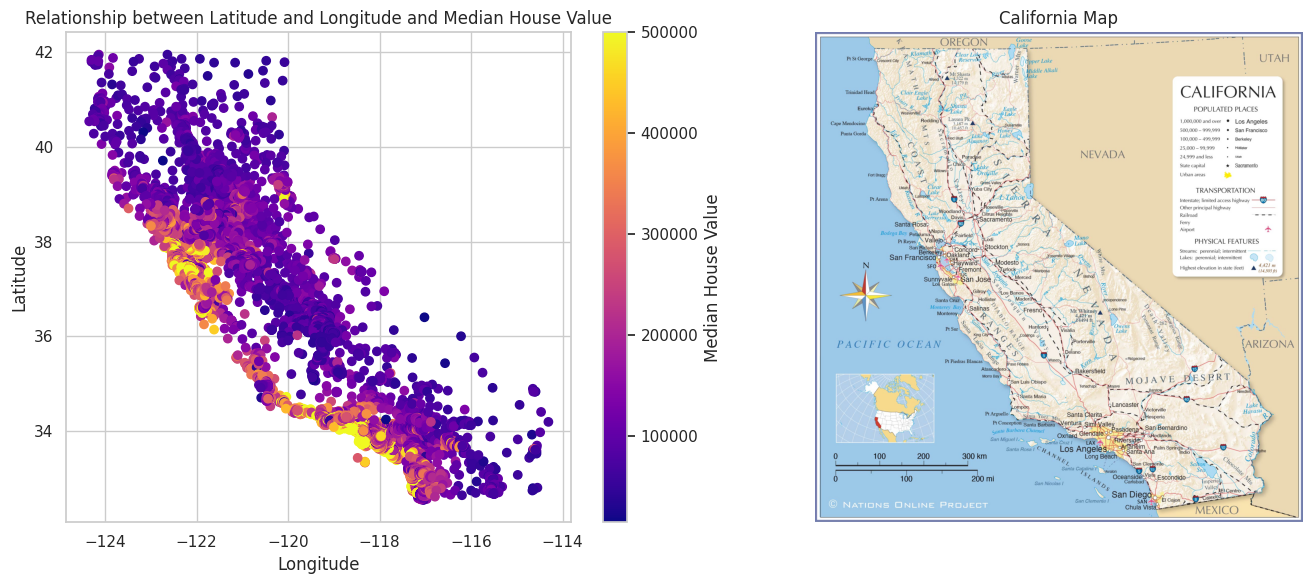

In [ ]:
image_path = '/content/drive/MyDrive/Classroom/1st Sem 2024-25 (BITS F464: Machine Learning)/California_map-L.jpg'
img = mpimg.imread(image_path)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
scatter_plot = ax[0].scatter(df['longitude'], df['latitude'], c=df['median_house_value'], cmap='plasma')
cbar = fig.colorbar(scatter_plot, ax=ax[0])
cbar.set_label('Median House Value')
ax[0].set_title('Relationship between Latitude and Longitude and Median House Value')
ax[0].set_xlabel("Longitude")
ax[0].set_ylabel("Latitude")
ax[1].imshow(img)
ax[1].axis('off')
ax[1].set_title("California Map")
plt.tight_layout()
plt.show()

# Question 9

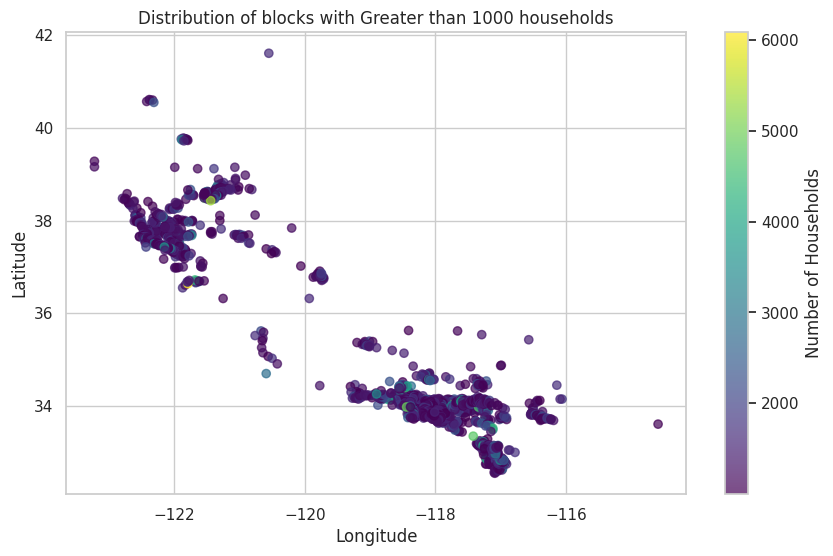

In [ ]:
df_filtered = df[df['households'] > 1000]
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['longitude'], df_filtered['latitude'], c=df_filtered['households'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Number of Households')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Distribution of blocks with Greater than 1000 households')
plt.show()


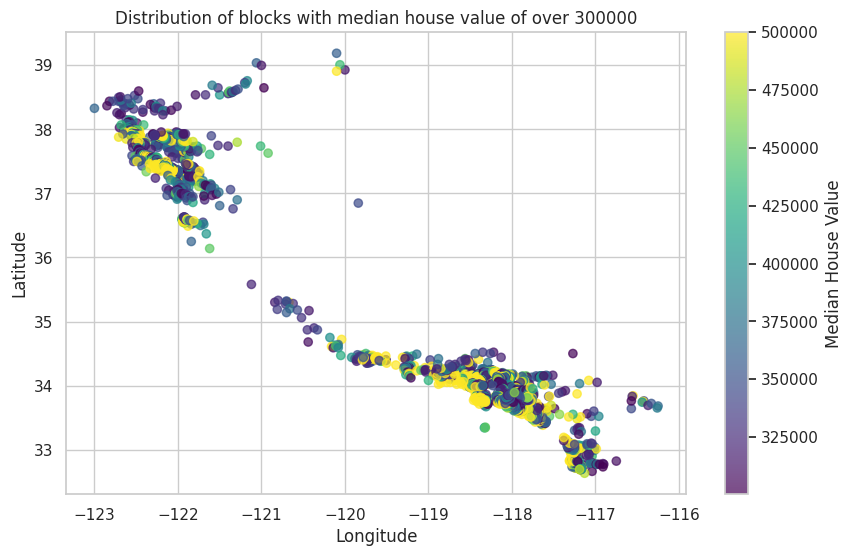

In [ ]:
df_filtered = df[df['median_house_value'] > 300000]
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['longitude'], df_filtered['latitude'], c=df_filtered['median_house_value'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Median House Value')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Distribution of blocks with median house value of over 300000')
plt.show()


The 2 chosen observations highlight the large population density and presence of houses with higher median house values in the cities of Los Angeles (North) and San Diego (South).

# Question 10

In [ ]:
grouped_data = df.groupby('ocean_proximity')
ocean_proximity_le = LabelEncoder()
df['ocean_proximity'] = ocean_proximity_le.fit_transform(df['ocean_proximity'])
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,3
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,3
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,3
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,3
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,3


In [ ]:
def visualize_ocean_proximity_impact(df, attribute):
  plt.figure(figsize=(10, 6))
  sns.boxplot(x='ocean_proximity', y=attribute, data=df, palette = 'viridis')
  plt.xlabel('Ocean Proximity')
  plt.ylabel(attribute)
  plt.title(f'Distribution of {attribute} across Ocean Proximity Groups')
  plt.xticks(ticks=range(len(ocean_proximity_le.classes_)), labels=ocean_proximity_le.classes_, rotation=45)
  plt.show()


<ipython-input-60-cb809ae82545>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='ocean_proximity', y=attribute, data=df, palette = 'viridis')


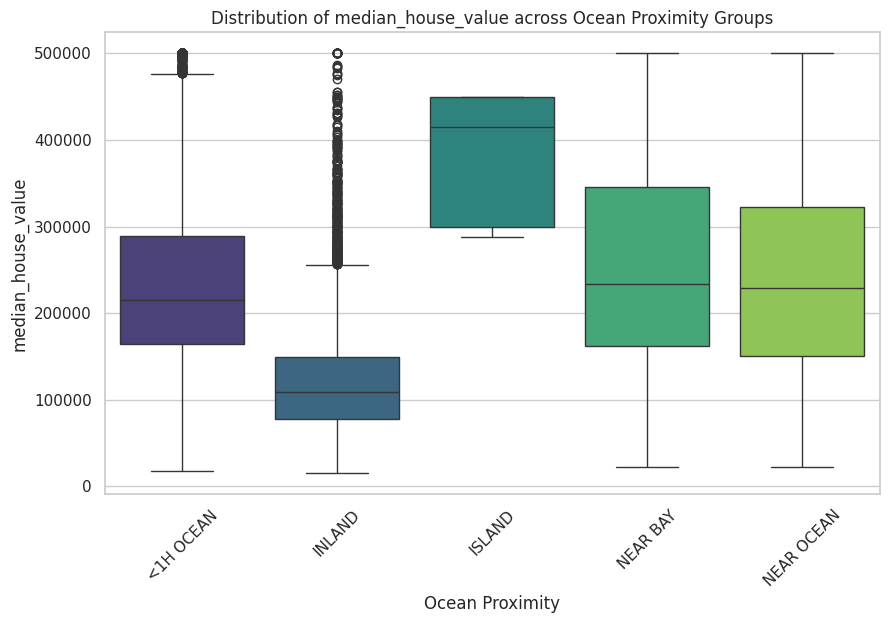

In [ ]:
visualize_ocean_proximity_impact(df, 'median_house_value')

# Question 11

<Axes: >

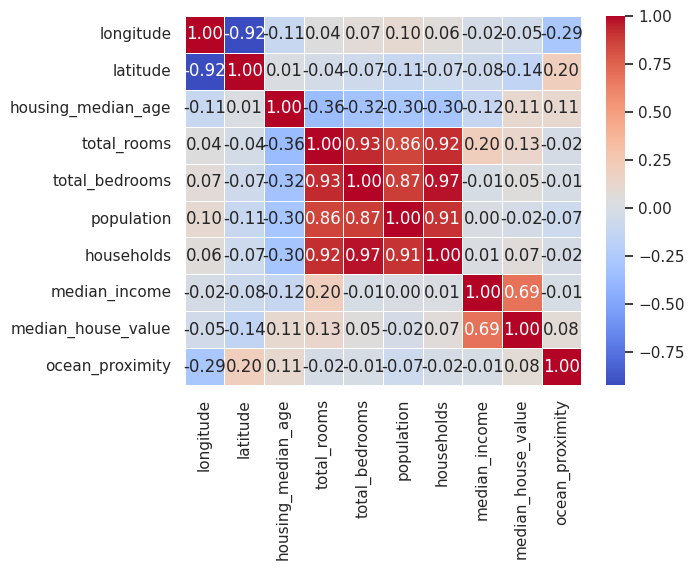

In [ ]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt = ".2f", cmap = 'coolwarm', linewidths = 0.5)

###Observations
*   `total_rooms` and `total_bedrooms` have a very high positive correlation (0.93) as expected, as the number of bedrooms will increase with an increase in the number of rooms.
*   `households` is strongly correlated with `total_rooms` (0.92) and `total_bedrooms` (0.97), indicating that as number of households increase, number of rooms and bedrooms also increase.
*   `population` has a strong correlation with `total_rooms` (0.86), `total_bedrooms` (0.87), and `households` (0.91). This suggests that larger populations are associated with more rooms, bedrooms, and households.
*   `median_house_value` and `median_income` also have a fairly significant correlation (0.67). This indicates that regions with higher median income also have houses with higher median value.
*   `latitude` and `longitude` have a high negative correlation (-0.92), which indicates that as one increases, the other decreases.

In [ ]:
def generate_boxplots(df):
    df_numeric = df.select_dtypes(include=['number'])
    sns.set(style="whitegrid")
    n_cols = 3
    n_rows = (len(df_numeric.columns) + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4 * n_rows))
    axes = axes.flatten()
    for i, column in enumerate(df_numeric.columns):
        sns.boxplot(y=df_numeric[column], ax=axes[i])
        axes[i].set_title(f'Box Plot of {column}')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Value')
    for j in range(i + 1, n_rows * n_cols):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

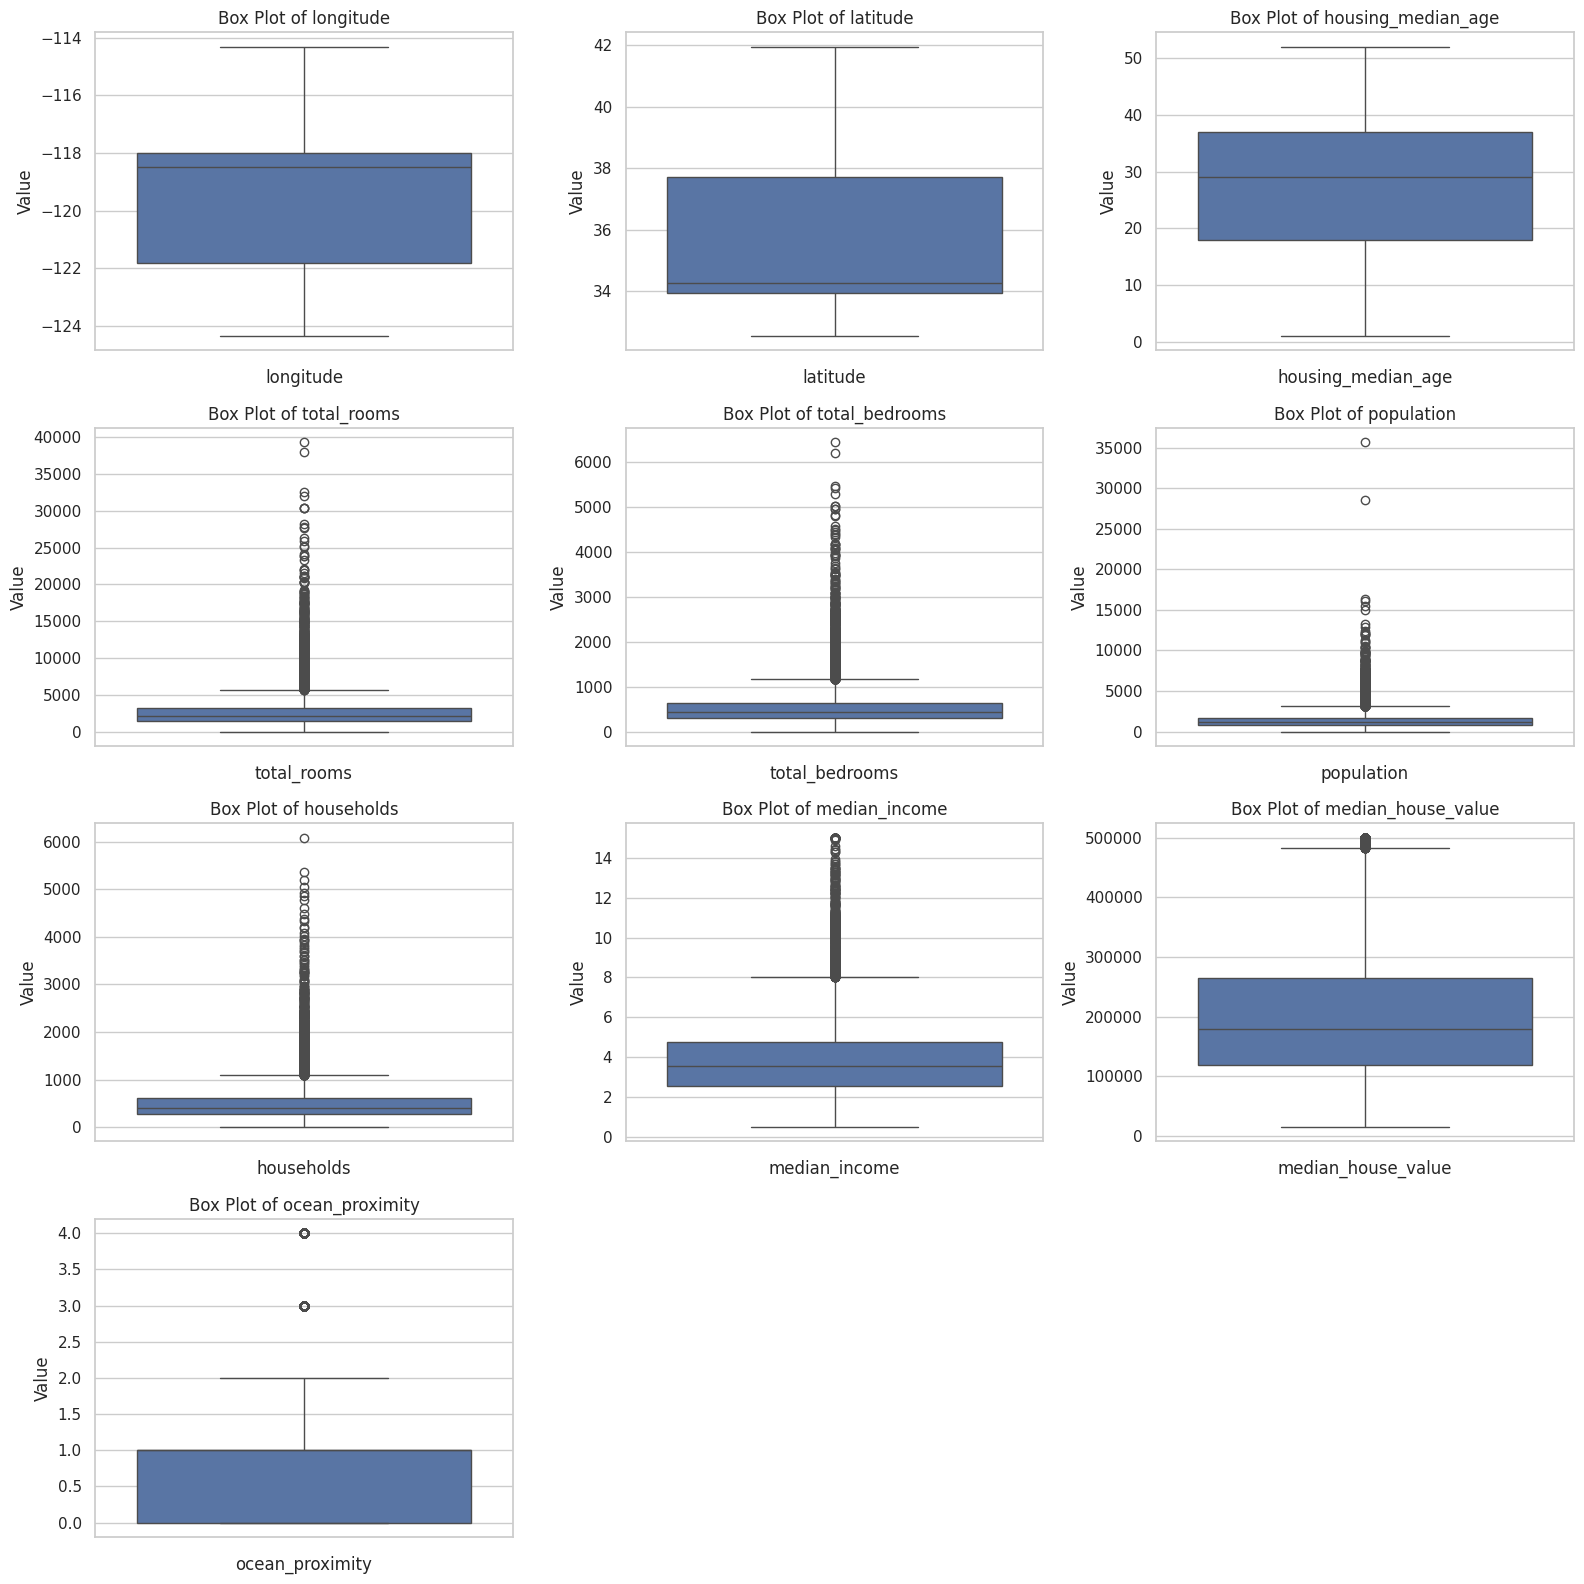

In [ ]:
generate_boxplots(df)

###Observations

*   `total_rooms`, `total_bedrooms`, `population`, `households`, `median_income`: These features show large number of outliers, as can be seen by the many data points far from the whiskers in their box plots.

###Feature Importance
*   `median_income`: Since it is strongly correlated with `median_house_value` (0.69), this feature could be important in predicting house values.
*   `total_rooms`, `total_bedrooms`, `households` and `population`: These features are correlated with each other and might capture similar information about population density.


<ipython-input-77-c8c0847f94d5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_premium['cost_per_sqft'] = df_premium['median_house_value'] / df_premium['total_rooms']


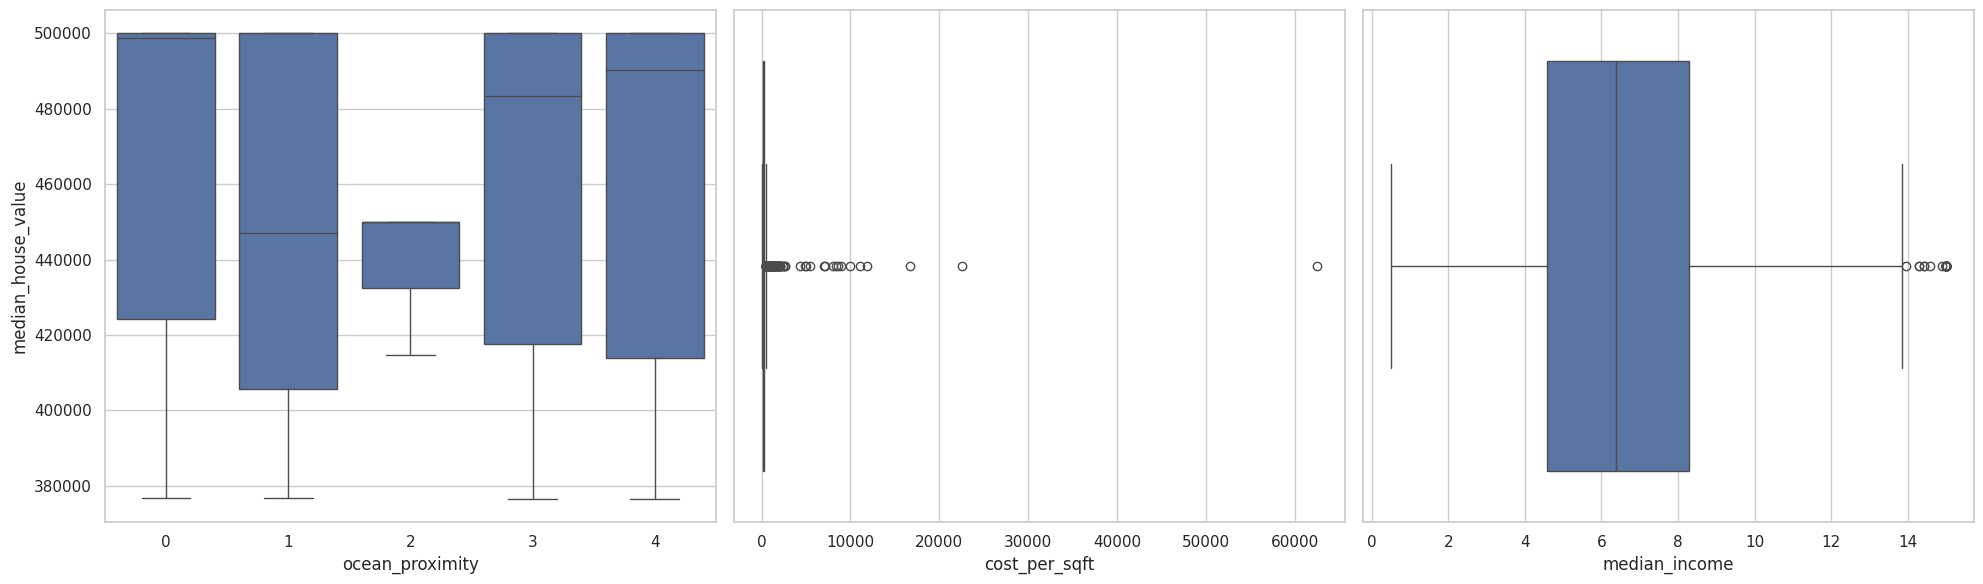

In [ ]:
non_premium = df['median_house_value'].quantile(0.90)
df_premium = df[df['median_house_value'] >= non_premium]
df_premium['cost_per_sqft'] = df_premium['median_house_value'] / df_premium['total_rooms']
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
sns.boxplot(x=df_premium['ocean_proximity'], y=df_premium['median_house_value'], ax=axes[0])
sns.boxplot(x=df_premium['cost_per_sqft'], ax=axes[1])
sns.boxplot(x=df_premium['median_income'], ax=axes[2])

plt.tight_layout()
plt.show()

# Question 12

In [ ]:
def visualize(df: pd.DataFrame, col: str):
    fig, axes  =  plt.subplots(1, 3, figsize = (18, 6))

    sns.kdeplot(df[col], ax = axes[0])
    axes[0].set_title(f'KDE of {col}')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Density')

    sns.boxplot(x = df[col], ax = axes[1])
    axes[1].set_title(f'Box Plot of {col}')
    axes[1].set_xlabel(col)
    axes[1].set_ylabel('Value')

    sns.scatterplot(x = df[col], y = df['median_house_value'], ax = axes[2])
    axes[2].set_title(f'Scatter Plot of {col} vs. Median House Value')
    axes[2].set_xlabel(col)
    axes[2].set_ylabel('Median House Value')

    plt.tight_layout()
    plt.show()

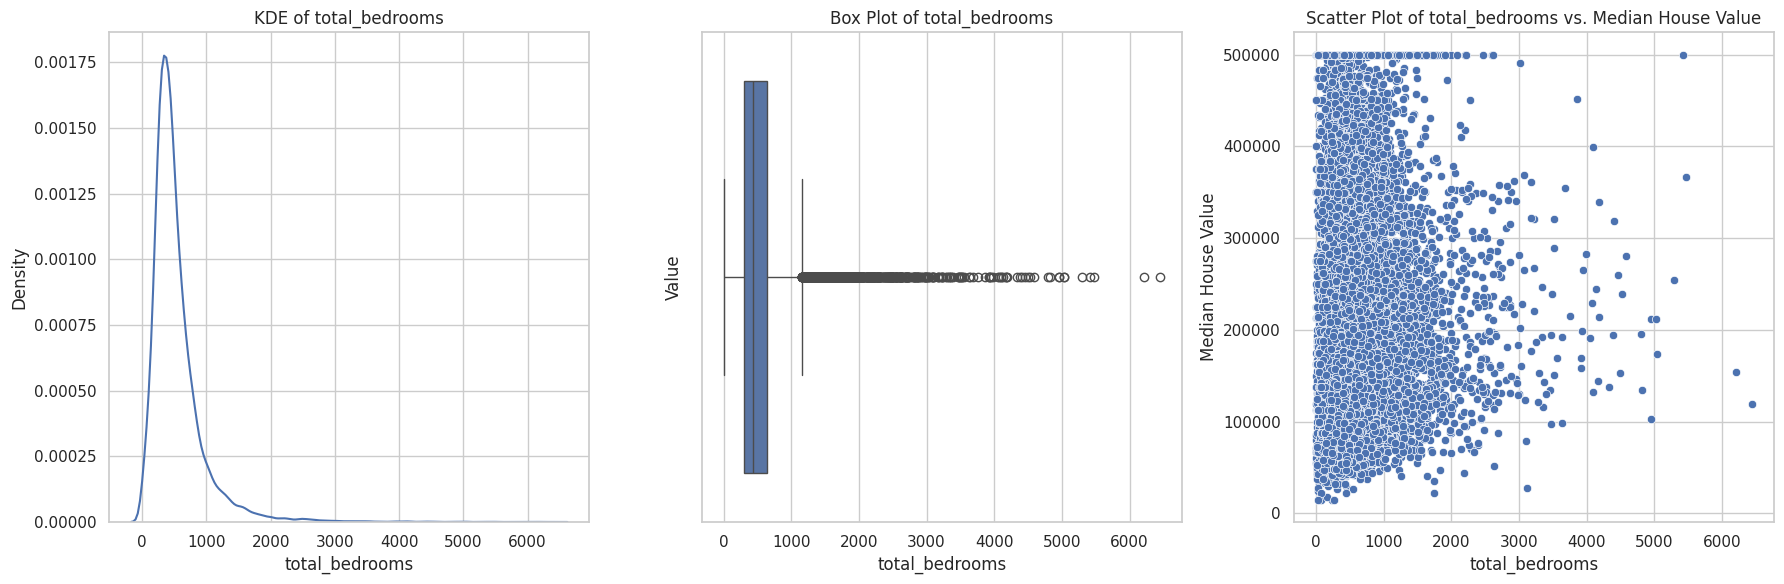

In [ ]:
visualize(df, 'total_bedrooms')

# Question 13

In [ ]:
pd.set_option('display.width', 1000)

def find_outliers(column_name):
    mean = df[column_name].mean()
    std_dev = df[column_name].std()
    lower_bound = mean - 2 * std_dev
    upper_bound = mean + 2 * std_dev
    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

which are outliers :\n{outliers}')
    print(f'Lower Bound : {lower_bound}')
    print(f'Upper Bound : {upper_bound}')
    return outliers.shape[0]

median_house_value_outliers = find_outliers('median_house_value')
print(f'Number of outliers : {median_house_value_outliers}')

pd.reset_option('display.width')



Data points which are outliers :
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  population  households  median_income  median_house_value  ocean_proximity
0        -122.23     37.88                  41          880           129.0         322         126         8.3252              452600                3
89       -122.27     37.80                  52          249            78.0         396          85         1.2434              500001                3
140      -122.18     37.81                  30          292            38.0         126          52         6.3624              483300                3
459      -122.25     37.87                  52          609           236.0        1349         250         1.1696              500001                3
489      -122.25     37.86                  48         2153           517.0        1656         459         3.0417              489600                3
...          ...       ...                 ...         

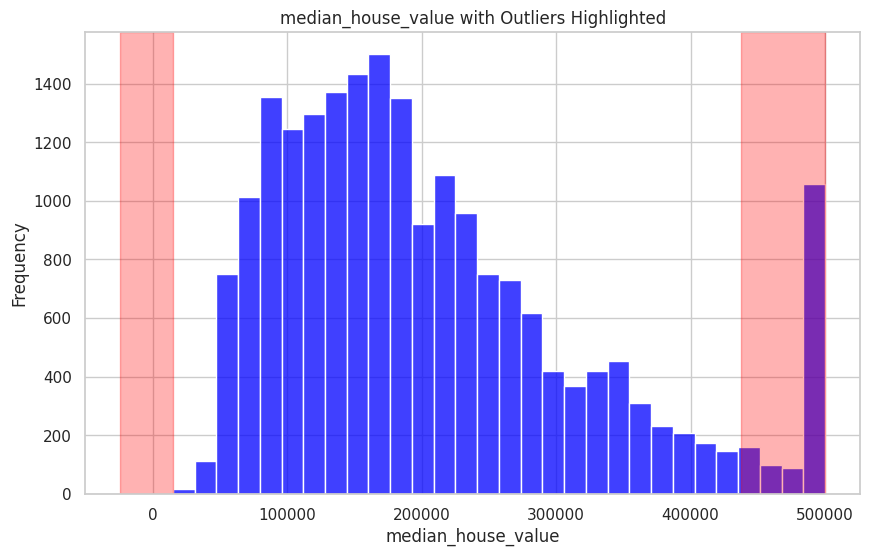

In [ ]:
def highlight_outliers(column):
  mean = df[column].mean()
  std_dev = df[column].std()

  lower_bound = mean - 2 * std_dev
  upper_bound = mean + 2 * std_dev

  plt.figure(figsize=(10, 6))

  sns.histplot(df[column], bins=30, kde=False, color='blue')

  plt.axvspan(xmin=df[column].min(), xmax=lower_bound, color='red', alpha=0.3)
  plt.axvspan(xmin=upper_bound, xmax=df[column].max(), color='red', alpha=0.3)

  plt.title(f'{column} with Outliers Highlighted')
  plt.xlabel(column)
  plt.ylabel('Frequency')

  plt.show()

highlight_outliers('median_house_value')

# Question 14

In [ ]:
x = df.drop(['median_house_value'] , axis = 1).values
y= df['median_house_value' ].values

In [ ]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mm_scaler = MinMaxScaler()
x_mm = mm_scaler.fit_transform(x)
s_scaler = StandardScaler()
x_s = s_scaler.fit_transform(x)

In [ ]:
min_mm_values = np.min(x_mm, axis=0)
max_mm_values = np.max(x_mm, axis=0)
print(f'Range of Min-Max Scaler: {min_mm_values, max_mm_values}')
mean_s_values = np.mean(x_s, axis=0)
std_s_values = np.std(x_s, axis=0)
min_s_values = mean_s_values - std_s_values
max_s_values = mean_s_values + std_s_values
print(f'Range of Standard Scaler: {min_s_values, max_s_values}')

Range of Min-Max Scaler: (array([0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([1., 1., 1., 1., 1., 1., 1., 1., 1.]))
Range of Standard Scaler: (array([-1., -1., -1., -1., -1., -1., -1., -1., -1.]), array([1., 1., 1., 1., 1., 1., 1., 1., 1.]))


In [ ]:
robust_scaler = RobustScaler()
x_robust = robust_scaler.fit_transform(x)
quantile_transformer = QuantileTransformer()
x_quantile = quantile_transformer.fit_transform(x)
power_transformer = PowerTransformer()
x_power = power_transformer.fit_transform(x)

In [ ]:
min_robust_values = np.min(x_robust, axis=0)
max_robust_values = np.max(x_robust, axis=0)
print(f'Range of Robust Scaler: {min_robust_values, max_robust_values}')
min_quantile_values = np.min(x_quantile, axis=0)
max_quantile_values = np.max(x_quantile, axis=0)
print(f'Range of Quantile Transformer: {min_quantile_values, max_quantile_values}')
min_power_values = np.min(x_power, axis=0)
max_power_values = np.max(x_power, axis=0)
print(f'Range of Power Transformer: {min_power_values, max_power_values}')

Range of Robust Scaler: (array([-1.54617414, -0.45502646, -1.47368421, -1.2498162 , -1.2534296 ,
       -1.23987207, -1.25538462, -1.39225176, -1.        ]), array([ 1.10290237,  2.03439153,  1.21052632, 21.87501838, 17.35740072,
       36.79744136, 17.45538462,  5.25967383,  3.        ]))
Range of Quantile Transformer: (array([0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([1., 1., 1., 1., 1., 1., 1., 1., 1.]))
Range of Power Transformer: (array([-4.02455846e-15, -1.81599423e+00, -2.49556104e+00, -4.90790828e+00,
       -4.61509438e+00, -4.52852170e+00, -4.40333500e+00, -3.44608478e+00,
       -1.03741933e+00]), array([5.71764858e-15, 2.08152863e+00, 1.76101030e+00, 5.68487543e+00,
       5.24334185e+00, 7.45061902e+00, 5.43946623e+00, 3.14657147e+00,
       1.50531040e+00]))


Standard Scaling: It results in a transformation where the mean of the rescaled features is 0 and the standard deviation is 1. It is preferred for algorithms that assume normally distributed data. It is not suitable for sparse data.

Min-Max Scaling: It rescales the dataset so that each value falls in between 0 and 1. It is more sensitive to outliers, especially if there are extreme maximum and minimum values.

Robust Scaler : It scales the features using median and interquartile range (IQR).It is less effected by outliers. Centering and scaling happen independently on each feature. Median and interquartile range are then stored to be used on later data.

Quantile Transform : It transforms the features to follow a uniform or a normal distribution. It tends to spread out the most frequent values. It is applied on each feature independently where an estimate of a distribution function is used to map the original values to a uniform distribution.

Power Transformer : It is applied to make the data more Gaussian-like. It is useful when dealing with data with non-constant variance.

**Advantages over MinMaxScaler and StandardScaler**

Unlike MinMaxScaler and StandardScaler, RobustScaler is more resistant to outliers. It scales features using median and interquartile range (IQR) instead of mean and standard deviation which makes it robust to the presence of extreme values.

QuantileTransformer can map the data to a specified distribution which is useful when data is highly skewed or does not follow a normal distribution, making it more suitable for models that assume normally distributed input features.

PowerTransformer stabilizes variance, which can help in cases where the variability of the data changes with the level of the measured variable. It is specifically designed to reduce skewness in the data, transforming it to make it more Gaussian-like while MinMaxScaler and StandardScaler do not address skewness - it rescale the data without changing its distribution.